In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Models
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split


In [7]:
# read csv

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
df_raw.to_csv("bank-marketing-campaign-data.csv")

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38559,69,retired,married,professional.course,no,no,yes,cellular,oct,thu,...,1,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39646,40,technician,married,professional.course,no,yes,no,cellular,may,wed,...,1,3,4,success,-1.8,93.876,-40.0,0.682,5008.7,yes
5358,51,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15967,32,blue-collar,married,basic.4y,unknown,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32607,29,admin.,divorced,basic.9y,no,no,no,cellular,may,mon,...,3,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
39981,35,admin.,married,university.degree,no,yes,no,cellular,jun,tue,...,1,5,1,success,-1.7,94.055,-39.8,0.761,4991.6,no
4159,37,blue-collar,married,professional.course,no,yes,no,telephone,may,mon,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
35096,29,services,single,basic.9y,no,yes,no,cellular,may,fri,...,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
32761,38,blue-collar,married,high.school,unknown,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
34201,38,housemaid,divorced,university.degree,no,yes,no,cellular,may,wed,...,3,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,yes


In [10]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


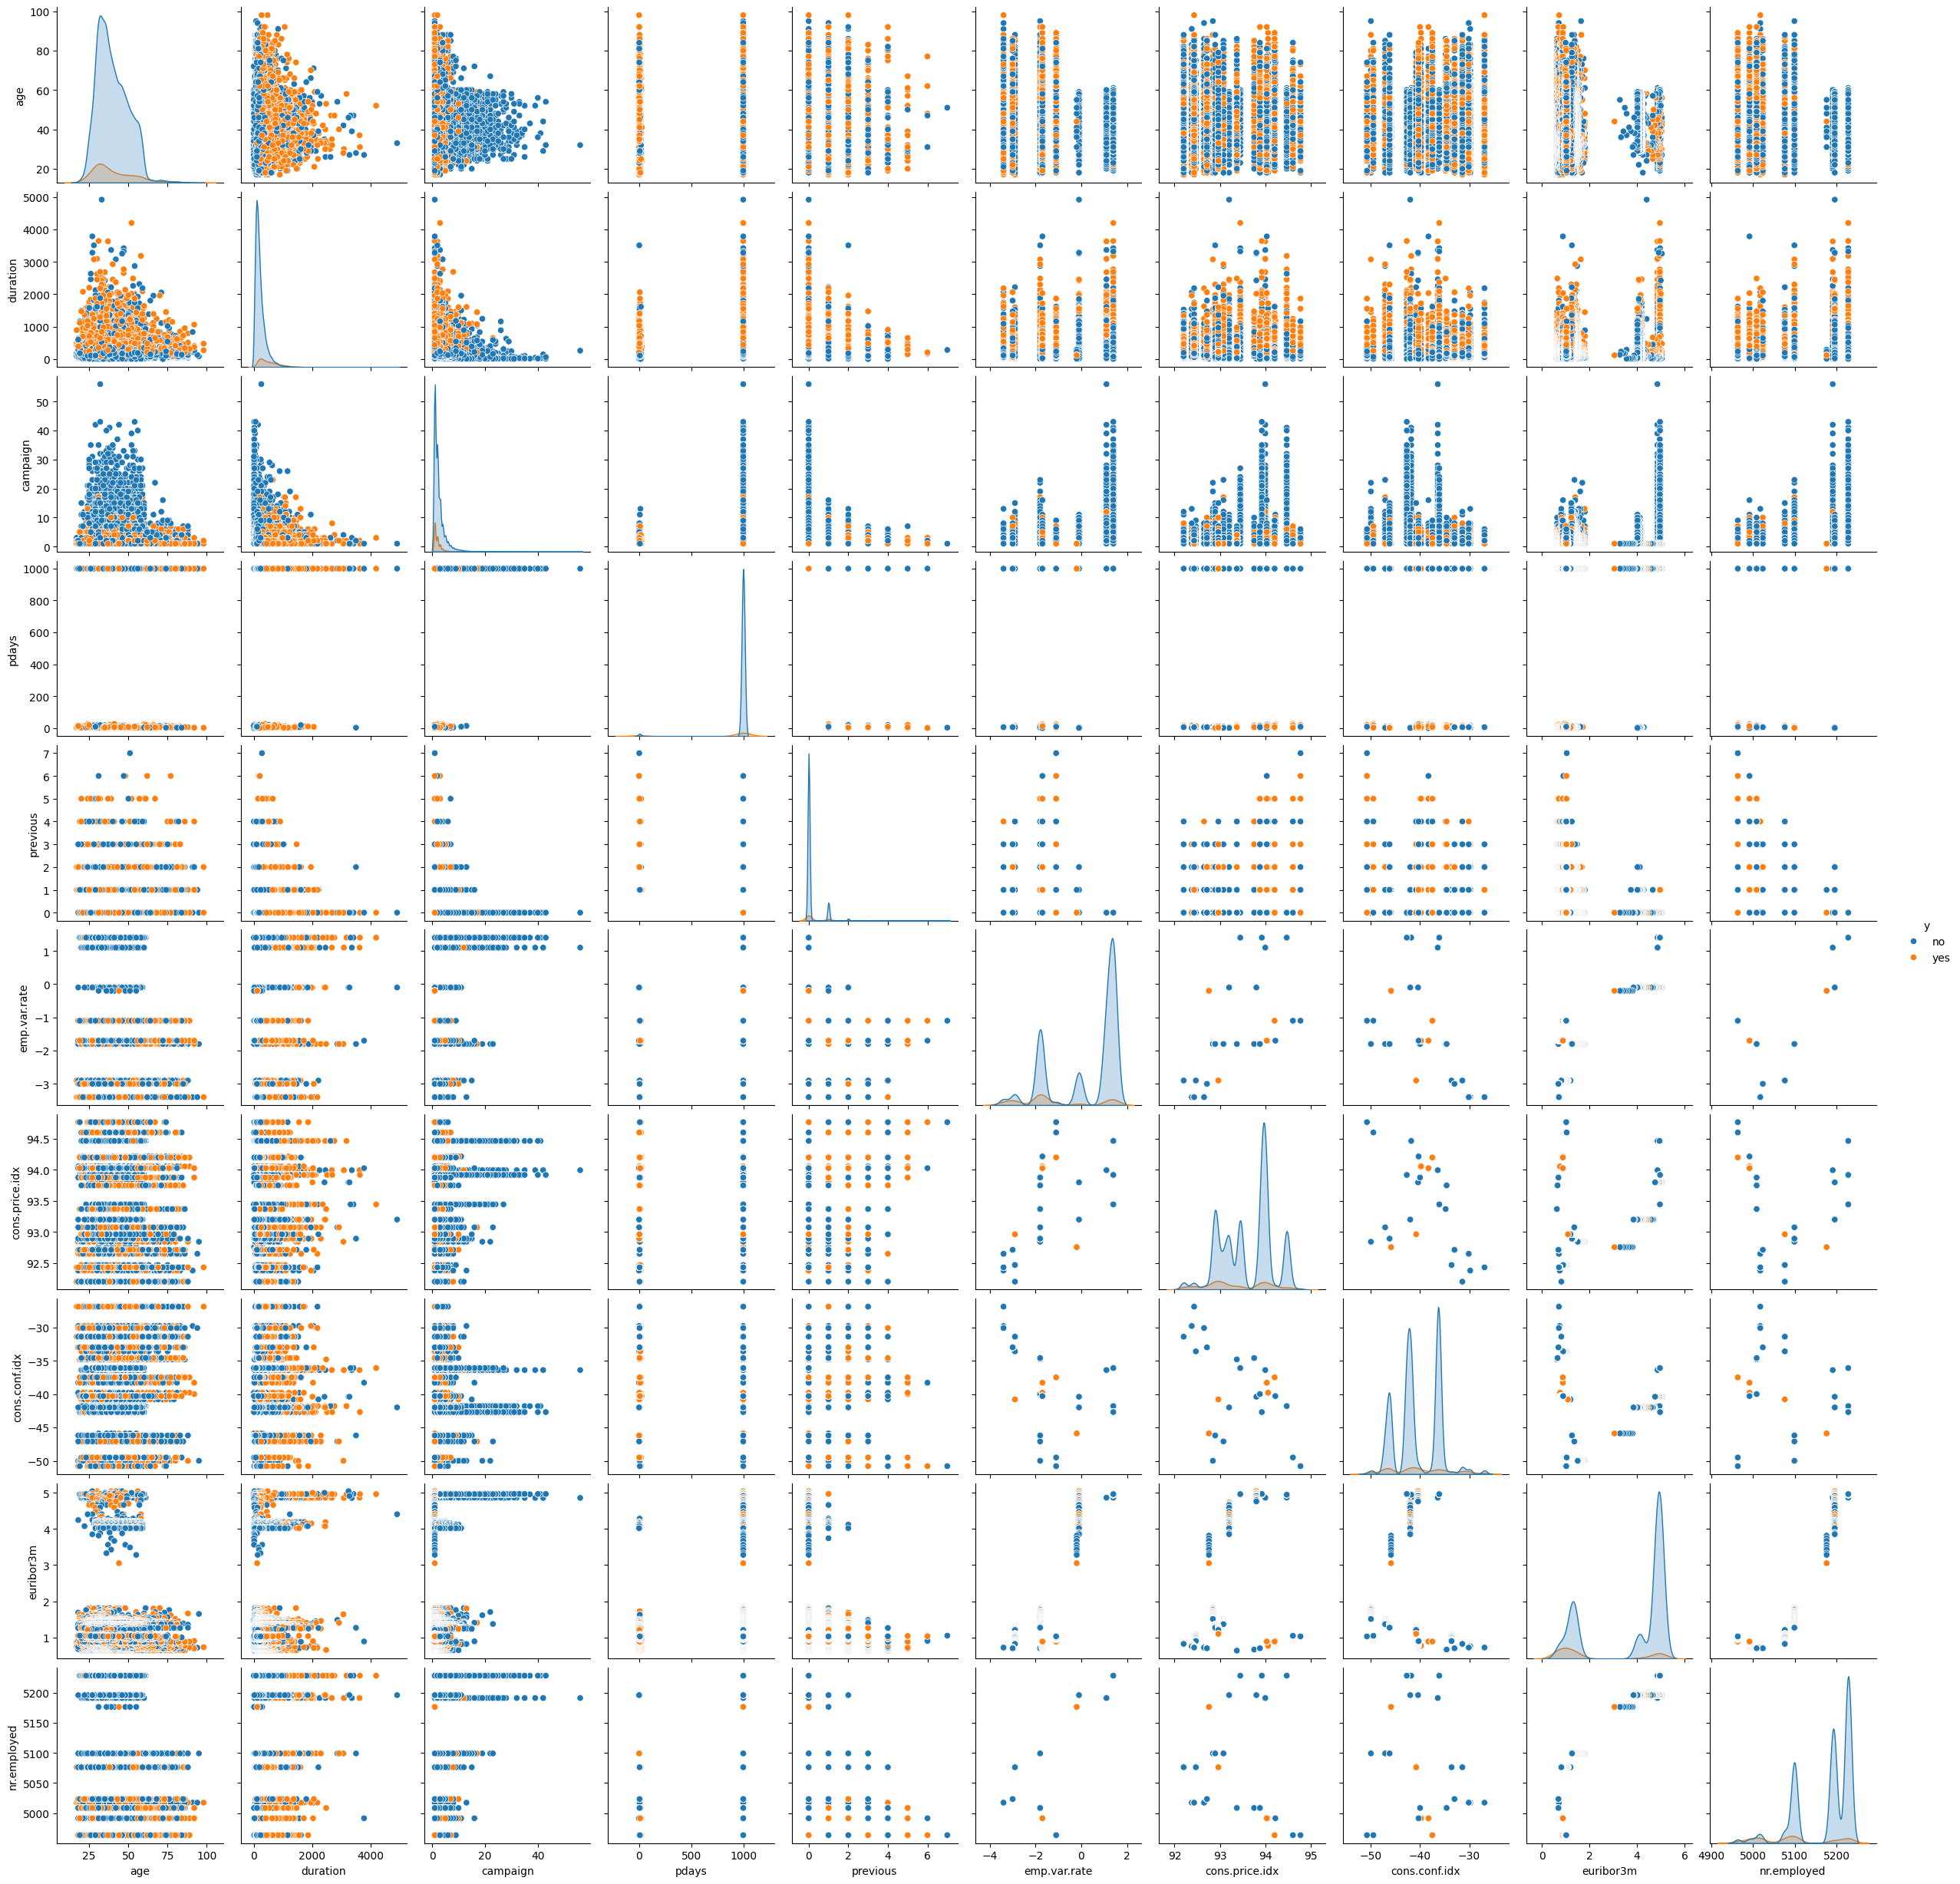

In [11]:
# Visualize data

#Pairplot

sns.pairplot(data=df_raw, hue='y')
plt.show()

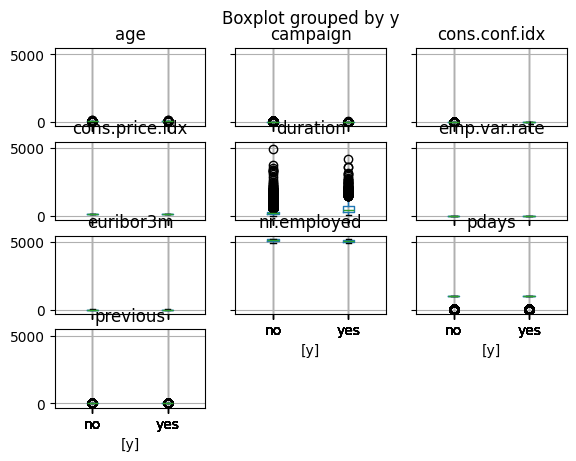

In [12]:
# Boxplots

df_raw.boxplot(by='y')
plt.show()

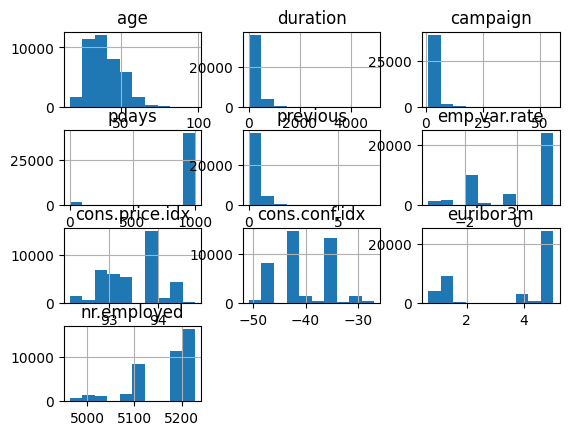

In [16]:
# Histograms

df_raw.hist()
plt.show()

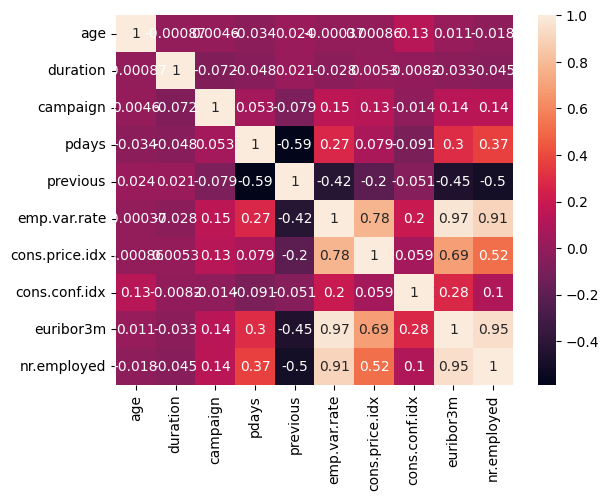

In [15]:
# Correlation

numerical = df_raw.select_dtypes(include=[np.number])

correlation = numerical.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [17]:
processed_df = df_raw.copy()
processed_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [20]:
# Logistic Regression (with all features)

# 1) split data

X = processed_df.drop(columns=['y'])

y = processed_df['y'] #target

# 1.1 hot-one encoding (errors arose from categorical values)

X_encoded = pd.get_dummies(X, drop_first=True)


# 2) split sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=2001)


# Run model

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)


# test the prediction

y_hat = log_model.predict(X_test)


# evaluation and results

print(f"Accuracy: {accuracy_score(y_test, y_hat)}")
print(f"Classification Report: \n{classification_report(y_test, y_hat)}")

# ver coeficientes para ver el peso de cada variable, just in case...

print(f"Coefficients: \n{log_model.coef_}")

Accuracy: 0.9062879339645545
Classification Report: 
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.63      0.40      0.49       928

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238

Coefficients: 
[[ 3.03633412e-03  4.77567866e-03 -5.25333222e-02 -1.90402823e-03
  -2.68008202e-01 -2.93528622e-01  3.44069167e-01  1.64368490e-02
  -1.88084799e-01 -6.41828955e-03 -2.61254118e-01 -4.44783143e-02
  -2.16721417e-02  2.48616569e-02  1.09906977e-01 -1.12783992e-02
  -8.53586336e-02  1.00135048e-01  4.62393028e-02  3.96012637e-03
   2.26219563e-03 -6.60676538e-02  9.43734192e-02  4.09924556e-03
  -6.31774376e-02 -1.10625446e-01 -5.76159397e-02  2.62166071e-03
   4.08668080e-02  2.19918615e-01  3.69029561e-02 -2.36695860e-01
  -8.32449346e-05 -1.44651392e-02  2.04675235e-02 -1.44651392e-02
  -6.141574